# STEP BY STEP DATA PREPROCESSING & EDA

Nguồn tham khảo: https://www.kaggle.com/code/agrawaladitya/step-by-step-data-preprocessing-eda/notebook

### NỘI DUNG:
1. [About the dataset](#1)
2. [Importing Data](#2)
3. [EDA & Preprocessing](#3)  
    + 3.1. [Boxplot of Numerical Variables](#3.1)
    + 3.2. [Handling Outliers](#3.2)
    + 3.3. [Joint Distribution of bra_size vs size](#3.3)
4. [Data Cleaning & Preprocessing](#4)
    + 4.1. [Step-by-step feature processing](#4.1)
    + 4.2. [Feature Engineering - new feature added](#4.2)
5. [EDA with Visualizations](#5)


<a id="1"></a>
# 1. About the dataset

>Tập dữ liệu này chứa phản hồi tự đánh giá về độ vừa vặn của quần áo từ khách hàng cũng như các thông tin phụ khác như đánh giá, xếp hạng, danh mục sản phẩm, kích thước danh mục, số đo của khách hàng (v.v.) từ 2 trang web:
>1. [Modcloth](http://modcloth.com)
>2. [Renttherunway](http://renttherunway.com)

>**Note:** Trong cả hai tập dữ liệu, phản hồi về độ vừa của quần áo thuộc ba loại sau: ‘Small,’ ‘Fit,’ and ‘Large.’ Ngoài ra, một số giả định đã được đưa ra về các tính năng trong tập dữ liệu.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

<a id="2"></a>
# 2. Importing data

Sử dụng hàm `pd.read_json()`, tệp json được đưa vào DataFrame của Pandas, với tham số **lines** là **True** - vì mỗi đối tượng mới được phân tách bằng một dòng mới.

In [2]:
mc_df = pd.read_json('modcloth_final_data.json', lines=True)
mc_df.head()

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,5ft 6in,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30.0,7,2.0,b,NaN,32.0,new,NaN,5ft 7in,Ugggh,slightly long,small,395665,9.0,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36.0,new,NaN,5ft 2in,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN


<a id="3"></a>
# 3. EDA - Exploratory Data Analysis

Chúng ta đã có thể thực hiện một vài quan sát ở đây, bằng cách nhìn vào phần đầu của dữ liệu:
1. Có các giá trị bị thiếu (NaN) trong khung dữ liệu cần được xử lý.
2. Cộc **cup size** chứa nhiều tùy chọn - sẽ cần xử lý, nếu chúng tôi muốn xác định **cup size** là kiểu dữ liệu 'category'.
3. Cột **Height** cần được phân tích để trích xuất chiều cao ở dạng số (**numerical**), hiện tại nó trông giống như chuỗi - string (object).
4. Ngoài ra, việc này không quá quan trọng, tuy nhiên một số cột có thể thực hiện với việc đổi tên - để xóa khoảng trắng.

Đầu tiên, chúng tôi xử lý việc đặt tên cột để dễ truy cập trong Pandas.

In [3]:
mc_df.columns

Index(['item_id', 'waist', 'size', 'quality', 'cup size', 'hips', 'bra size',
       'category', 'bust', 'height', 'user_name', 'length', 'fit', 'user_id',
       'shoe size', 'shoe width', 'review_summary', 'review_text'],
      dtype='object')

In [4]:
mc_df.columns = ['item_id', 'waist', 'size', 'quality', 'cup_size', 'hips', 'bra_size',
       'category', 'bust', 'height', 'user_name', 'length', 'fit', 'user_id',
       'shoe_size', 'shoe_width', 'review_summary', 'review_text']

In [5]:
mc_df.head()

,item_id,waist,size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,5ft 6in,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30.0,7,2.0,b,NaN,32.0,new,NaN,5ft 7in,Ugggh,slightly long,small,395665,9.0,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36.0,new,NaN,5ft 2in,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN


In [6]:
mc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82790 entries, 0 to 82789
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   item_id         82790 non-null  int64  
 1   waist           2882 non-null   float64
 2   size            82790 non-null  int64  
 3   quality         82722 non-null  float64
 4   cup_size        76535 non-null  object 
 5   hips            56064 non-null  float64
 6   bra_size        76772 non-null  float64
 7   category        82790 non-null  object 
 8   bust            11854 non-null  object 
 9   height          81683 non-null  object 
 10  user_name       82790 non-null  object 
 11  length          82755 non-null  object 
 12  fit             82790 non-null  object 
 13  user_id         82790 non-null  int64  
 14  shoe_size       27915 non-null  float64
 15  shoe_width      18607 non-null  object 
 16  review_summary  76065 non-null  object 
 17  review_text     76065 non-null 

Chúng ta có thể mở rộng các quan sát của mình về dữ liệu bị thiếu (**missing data**) và các kiểu dữ liệu (**datatypes**) tại đây:
* Trong số 18 cột chỉ có 6 cột có dữ liệu đầy đủ.
* Khá nhiều dữ liệu dường như bị thiếu trong **bust**, **shoe width**, **shoe size** và **waist**.
* Chúng ta có thể đặc biệt xem xét các mặt hàng có shoe size và shoe width - đây có thể là giày!
* Rất nhiều cột có datatype = string (object datatype), cần được phân tích thành category datatype.
* Đặc biệt, cột **Waist** có rất nhiều giá trị NULL - vì hầu hết dữ liệu từ Modcloth đến từ 3 danh mục 'váy, áo và quần'.

### Looking at the percentage of missing values per column

In [7]:
missing_data = pd.DataFrame({'total_missing': mc_df.isnull().sum(), 'perc_missing': (mc_df.isnull().sum()/82790)*100})
missing_data

,total_missing,perc_missing
item_id,0,0.000000
waist,79908,96.518903
size,0,0.000000
quality,68,0.082136
cup_size,6255,7.555260
hips,26726,32.281677
bra_size,6018,7.268994
category,0,0.000000
bust,70936,85.681846
height,1107,1.337118


### Statistical description of numerical variables

In [8]:
mc_df.describe()

,item_id,waist,size,quality,hips,bra_size,user_id,shoe_size
count,82790.000000,2882.000000,82790.000000,82722.000000,56064.000000,76772.000000,82790.000000,27915.000000
mean,469325.229170,31.319223,12.661602,3.949058,40.358501,35.972125,498849.564718,8.145818
std,213999.803314,5.302849,8.271952,0.992783,5.827166,3.224907,286356.969459,1.336109
min,123373.000000,20.000000,0.000000,1.000000,30.000000,28.000000,6.000000,5.000000
25%,314980.000000,28.000000,8.000000,3.000000,36.000000,34.000000,252897.750000,7.000000
50%,454030.000000,30.000000,12.000000,4.000000,39.000000,36.000000,497913.500000,8.000000
75%,658440.000000,34.000000,15.000000,5.000000,43.000000,38.000000,744745.250000,9.000000
max,807722.000000,50.000000,38.000000,5.000000,60.000000,48.000000,999972.000000,38.000000


Một số lưu ý quan trọng, trước khi chúng ta đi sâu vào thực hiện các tác vụ tiền xử lý dữ liệu:
* Bra_size, có lẽ không cần phải là float-category dtype?
* Hầu hết các cỡ giày đều có kích thước khoảng 5-9, nhưng cỡ giày tối đa là 38! (Lí do có size 38 vì rang web sử dụng cỡ giày của Vương quốc Anh.)
* Size có giá trị tối thiểu là 0 và Size tối đa khớp với shoe_size (là 38).

Trực quan các đại lượng numerical trong tập dữ liệu dưới dạng `boxplot`, để hiểu rõ hơn về các giá trị ngoại lệ (**outlier**).

<a id="4"></a>
## 3.1 Boxplot of numerical variables

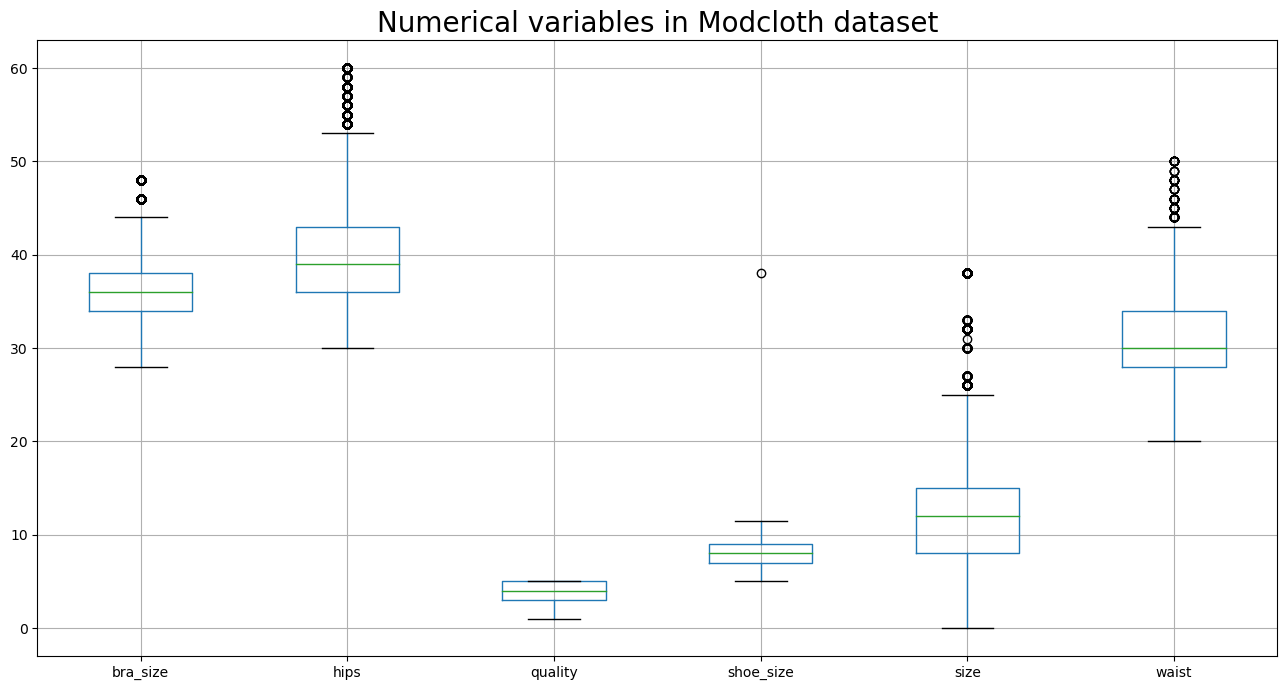

In [9]:
num_cols = ['bra_size','hips','quality','shoe_size','size','waist']
plt.figure(figsize=(16,8))
mc_df[num_cols].boxplot()
plt.title("Numerical variables in Modcloth dataset", fontsize=20)
plt.show();

<a id="5"></a>
## 3.2 Handling Outliers

* **shoe_size**:
Chúng ta có thể thấy rõ rằng giá trị tối đa duy nhất của cỡ giày (38) là một giá trị ngoại lệ và cách xử lí tốt nhất là chúng ta nên xóa hàng đó hoặc xử lý giá trị ngoại lệ đó.

In [10]:
mc_df[mc_df.shoe_size == 38]

,item_id,waist,size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
37313,416942,35.0,12,5.0,d,46.0,36.0,new,37-39,5ft 5in,Catslittle,just right,fit,237498,38.0,average,Cardigans are best item Mod Cloth has,"I love these cardigans, my favorite, good fabr..."


>Chúng ta có thể thấy rằng mục nhập có vẻ hợp lí, ngoại trừ shoe_size - khách hàng có thể nhập sai. Bây giờ chúng ta sẽ nhập giá trị này dưới dạng giá trị null.

In [11]:
mc_df.at[37313,'shoe_size'] = None

* **bra_size**:
+ Ta có thể thấy boxplot hiển thị 2 giá trị là outlier).
+ Chúng ta có thể xem qua 10 dòng bra-sizes đầu tiên theo thứ tự lớn xuống nhỏ (ascending = False).

In [12]:
mc_df.sort_values(by=['bra_size'], ascending=False).head(10)

,item_id,waist,size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
73118,753429,NaN,38,3.0,dd/e,NaN,48.0,bottoms,NaN,5ft 4in,Mikki,slightly long,large,93792,NaN,NaN,I probably should have or,"I probably should have ordered a size down, bu..."
80713,796383,NaN,12,4.0,k,60.0,48.0,outerwear,NaN,7ft 11in,bandnerd2522,just right,small,810539,11.5,average,"This jacket is lovely, bu","This jacket is lovely, but I couldn't move my ..."
28901,401773,NaN,38,4.0,dd/e,58.0,48.0,new,NaN,5ft 7in,barretts4jesus,just right,fit,59963,NaN,NaN,Wonderful cardigan. I hav,Wonderful cardigan. I have the honey one as we...
71407,726492,NaN,15,3.0,k,60.0,48.0,bottoms,NaN,7ft 11in,bandnerd2522,slightly short,fit,708288,11.5,average,The pattern is just as lo,"The pattern is just as lovely in person, as in..."
38125,417269,NaN,38,3.0,d,35.0,48.0,new,NaN,5ft 9in,Susan,just right,large,308819,NaN,NaN,I wish I could have gotte,I wish I could have gotten the 3x but it's sti...
57273,645822,NaN,32,5.0,ddd/f,55.0,48.0,tops,NaN,5ft,Lillie,just right,fit,732268,NaN,NaN,I wear this almost every,I wear this almost every single day! Yay! Some...
14033,171125,NaN,38,3.0,c,NaN,48.0,dresses,NaN,5ft 8in,dillsyrpickle,just right,small,416697,NaN,NaN,So I really wanted to lov,So I really wanted to love this dress. I'm a ...
28845,401773,NaN,26,3.0,b,55.0,48.0,new,50,5ft 6in,Michelle,just right,fit,340392,9.5,wide,These cardigans are a gre,These cardigans are a great way to achieve tha...
22637,353933,NaN,38,5.0,b,NaN,48.0,dresses,NaN,5ft 2in,Meghan,slightly long,fit,175295,NaN,NaN,No negatives to this dres,"No negatives to this dress, it's absolutely go..."
38063,417269,NaN,38,4.0,c,NaN,48.0,new,NaN,5ft 6in,Bea,very long,fit,799178,NaN,NaN,"I love the fabric, I love","I love the fabric, I love long tops, this one ..."


<a id="6"></a>
## 3.3 Joint Distribution of bra_size vs size
Ta có thể visualize sự phân bố của bra_size so với size  (hai biến số) để hiểu về các giá trị.

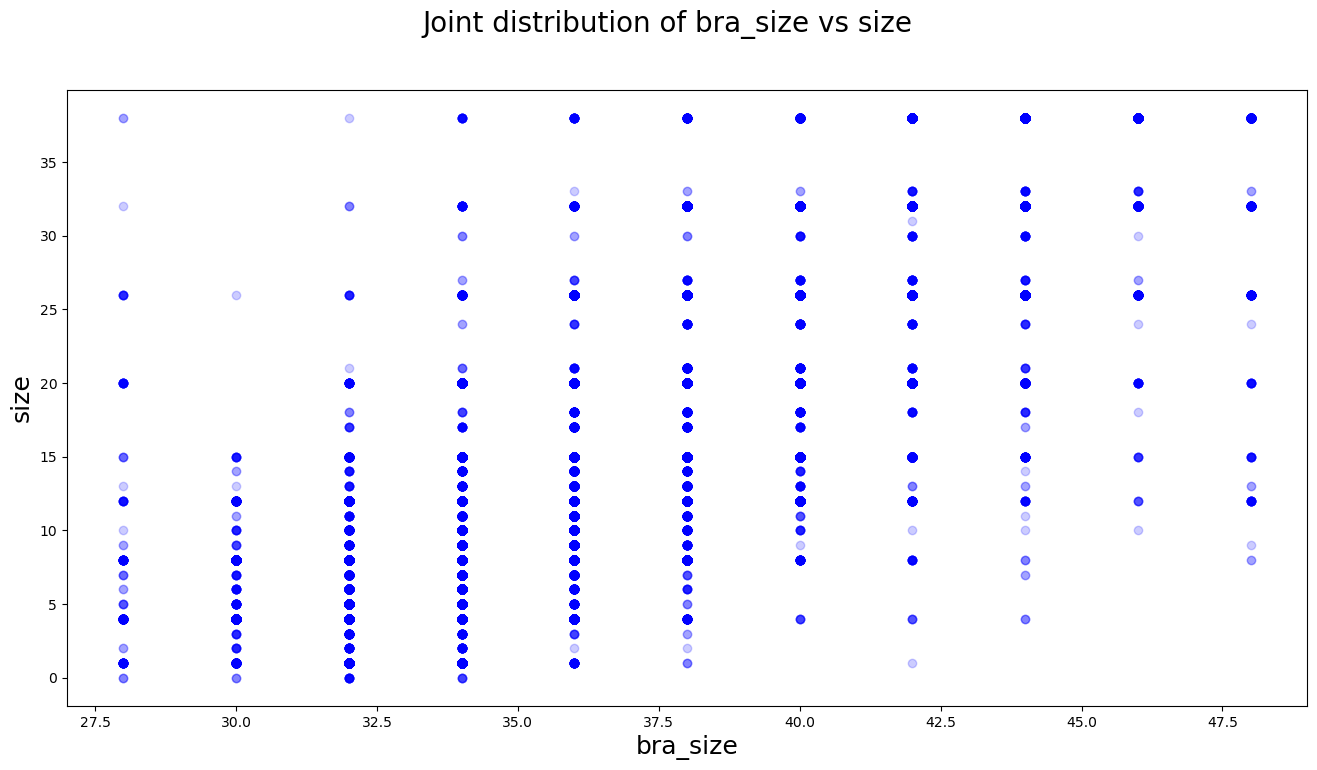

In [13]:
plt.figure(figsize=(16,8))
plt.xlabel("bra_size", fontsize=18)
plt.ylabel("size", fontsize=18)
plt.suptitle("Joint distribution of bra_size vs size", fontsize= 20)
plt.plot(mc_df.bra_size, mc_df['size'], 'bo', alpha=0.2)
plt.show();

>Chúng ta không thể thấy bất kỳ sai lệch đáng kể nào so với hành vi thông thường đối với bra-size, thực tế là đối với tất cả các biến số khác - chúng ta có thể xem các ngoại lệ 'rõ ràng' từ boxplot. Bây giờ, chúng ta sẽ tiến hành tiền xử lý tập dữ liệu để có những hình ảnh trực quan phù hợp.

<a id="7"></a>
# 4. Data Cleaning & Pre-processing
Hãy xử lý các biến và thay đổi dtype thành loại thích hợp cho mỗi cột. 

<a id="9"></a>
## 4.1 Step-by-step features processing:

+ **bra_size:** Mặc dù có vẻ là số nhưng nó chỉ nằm trong khoảng từ 28 đến 48, với hầu hết các kích cỡ nằm trong khoảng 34-38. Thật hợp lý khi chuyển đổi cái này thành **categorical** dtype. Chúng tôi sẽ điền các giá trị NA vào danh mục 'Unknown'. Chúng ta có thể thấy ở trên rằng hầu hết người mua đều có cỡ áo ngực là 34 hoặc 36.
+ **bust**- Chúng ta có thể thấy bằng cách xem xét các giá trị không phải là null, bust đó phải là một số nguyên dtype. Chúng ta cũng cần xử lý một trường hợp đặc biệt khi số bán thân được đưa ra là - '37-39'. Chúng tôi sẽ thay thế mục '37-39' bằng giá trị trung bình, tức là - 38, cho mục đích phân tích. Bây giờ chúng ta có thể chuyển đổi dtype thành int một cách an toàn. Tuy nhiên, do **khoảng 86% dữ liệu bức tượng bán thân bị thiếu** nên cuối cùng chúng tôi đã quyết định xóa feature này.
+ **category** - không thiếu, thay đổi thành dtype **category**.
+ **cup size** - Thay đổi dtype thành **category** cho cột này. Cột này có khoảng 7% giá trị bị thiếu. Xem xét các hàng thiếu giá trị này có thể gợi ý cho chúng tôi cách xử lý các giá trị bị thiếu này.

In [14]:
mc_df.bra_size = mc_df.bra_size.fillna('Unknown')
mc_df.bra_size = mc_df.bra_size.astype('category').cat.as_ordered()
mc_df.at[37313,'bust'] = '38'
mc_df.bust = mc_df.bust.fillna(0).astype(int)
mc_df.category = mc_df.category.astype('category')

In [15]:
mc_df[mc_df.cup_size.isnull()].sample(20)

,item_id,waist,size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
67383,698964,NaN,5,5.0,NaN,30.0,Unknown,bottoms,0,5ft 6in,Lauren,just right,fit,961695,8.0,NaN,LOVE LOVE LOOOOVE these j,LOVE LOVE LOOOOVE these jeans
40691,445254,NaN,8,5.0,NaN,NaN,Unknown,tops,0,5ft 6in,Kaitlin,just right,fit,535395,NaN,average,Fits perfect and super co,Fits perfect and super comfortable!
26083,394873,NaN,8,4.0,NaN,NaN,Unknown,dresses,0,5ft 2in,Jessica H.,just right,fit,976875,NaN,NaN,Perfect Maid(Matron) of Honor Dress,I bought this dress back in January as the Mat...
48070,519836,NaN,8,5.0,NaN,NaN,Unknown,tops,0,5ft 7in,parkermarcy,just right,fit,331630,NaN,NaN,Great quality shirt! Look,Great quality shirt! Looks great casual or dre...
53030,590933,NaN,8,4.0,NaN,NaN,Unknown,sale,0,5ft 2in,ria_719,very long,fit,208643,NaN,NaN,I really like this top. S,I really like this top. Soft material. My only...
68718,715662,NaN,12,5.0,NaN,NaN,Unknown,bottoms,0,5ft 2in,kml303,just right,fit,134455,NaN,NaN,I usually detest wearing,I usually detest wearing jean shorts because t...
68701,715662,28.0,8,4.0,NaN,36.0,Unknown,bottoms,0,5ft 3in,MartiJ,just right,small,713867,NaN,NaN,Adorable,I bought a medium in these shorts. They arriv...
58958,652823,NaN,12,3.0,NaN,NaN,Unknown,tops,0,5ft 3in,bradley.alison.m,just right,large,325234,NaN,NaN,This is a really cute top,"This is a really cute top, the print is adorab..."
37225,416738,NaN,4,4.0,NaN,NaN,Unknown,new,0,5ft 5in,pdxoxs,just right,fit,260416,NaN,NaN,Already own several color,"Already own several colors of this cardigan, p..."
66401,696347,NaN,6,2.0,NaN,NaN,Unknown,bottoms,0,5ft 1in,sweisman,slightly long,fit,985404,NaN,NaN,Good for about one wear,I really like these but after one or two wears...


+ **fit**- Thay đổi dtype thành **category** cho cột này. Chúng ta có thể thấy rằng đại đa số khách hàng đã phản hồi rất tốt về độ 'vừa vặn' cho các mặt hàng trên Modcloth!

In [16]:
mc_df.cup_size.fillna('Unknown', inplace=True)
mc_df.cup_size = mc_df.cup_size.astype('category').cat.as_ordered()

mc_df.fit = mc_df.fit.astype('category')

+ **height**- Chúng ta cần phân tích cột chiều cao vì hiện tại nó là một đối tượng chuỗi. Nó sẽ có ý nghĩa để chuyển đổi chiều cao thành cm. Chúng tôi cũng xem xét các hàng thiếu dữ liệu chiều cao.

In [17]:
def get_cms(x):
    if type(x) == type(1.0):
        return
    #print(x)
    try: 
        return (int(x[0])*30.48) + (int(x[4:-2])*2.54)
    except:
        return (int(x[0])*30.48)
mc_df.height = mc_df.height.apply(get_cms)

In [18]:
mc_df[mc_df.height.isnull()].head(10)
# Nhìn vào đầu ra để có thể hiểu rõ hơn các suy luận!

,item_id,waist,size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
3,123373,NaN,21,5.0,dd/e,NaN,Unknown,new,0,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
17,123373,NaN,15,4.0,dddd/g,NaN,36.0,new,0,NaN,Megan,just right,large,128353,NaN,NaN,NaN,NaN
43,123373,NaN,15,5.0,dd/e,NaN,36.0,new,0,NaN,sdhewey,just right,fit,670919,NaN,NaN,NaN,NaN
73,124124,NaN,20,4.0,c,NaN,38.0,new,0,NaN,Fiorella,just right,large,816504,NaN,NaN,NaN,NaN
131,124124,NaN,12,3.0,c,NaN,36.0,new,0,NaN,jmcrowder.1124,very short,fit,846091,NaN,NaN,NaN,NaN
213,124124,NaN,20,4.0,d,NaN,40.0,new,0,NaN,rhea_heather,just right,fit,121007,NaN,NaN,NaN,NaN
382,125442,NaN,5,5.0,b,NaN,34.0,new,0,NaN,kelsi.flatland,just right,large,5752,NaN,NaN,NaN,NaN
423,125442,NaN,7,5.0,c,NaN,34.0,new,0,NaN,Naomi,just right,fit,563612,NaN,NaN,NaN,NaN
456,125442,NaN,7,5.0,b,NaN,38.0,new,0,NaN,shirawzn,just right,fit,968605,NaN,NaN,NaN,NaN
475,125442,NaN,7,5.0,dd/e,36.0,30.0,new,0,NaN,Ingrid,just right,small,940714,NaN,NaN,NaN,NaN


<a id="10"></a>
## 4.2 Feature Engineering 
### Creating a new feature of first_time_user
 
Dựa trên những quan sát của chúng tôi ở trên, việc xác định các giao dịch thuộc về người dùng lần đầu là điều hợp lý. Chúng tôi sử dụng logic sau để xác định các nhận xét như vậy:
* Nếu bra_size/cup_size có giá trị, ngược lại height, hips, shoe_size, shoe_width và waist thì không có giá trị - đó là lần đầu tiên họ mua nội y.
* Nếu shoe_size/shoe_width có giá trị và ngược lại bra_size, cup_size, height, hips và waist thì không - đó là người mua giày lần đầu.
* Nếu hips/waist  có giá trị còn bra_size, cup_size, height, shoe_size và shoe_width thì không - đó là lần đầu tiên người mua váy/áo.

Dưới đây, chúng tôi sẽ xác minh logic trên, với các ví dụ mẫu, trước khi chúng tôi tạo tính năng mới.

**1. Xem xét một số hàng có bra_size hoặc cup_size nhưng không có số đo nào khác.**

**2. Xem xét một số hàng có shoe_size hoặc shoe_width nhưng không có phép đo nào khác.**

**3. Xem xét một số hàng có hông hoặc eo nhưng không có số đo nào khác.**

In [19]:
print(mc_df[((mc_df.bra_size != 'Unknown') | (mc_df.cup_size != 'Unknown')) & (mc_df.height.isnull()) & (mc_df.hips.isnull()) &
     (mc_df.shoe_size.isnull()) & (mc_df.shoe_width.isnull()) & (mc_df.waist.isnull())].head(3))
print(mc_df[(mc_df.bra_size == 'Unknown') & (mc_df.cup_size == 'Unknown') & (mc_df.height.isnull()) & (mc_df.hips.isnull()) &
     ((mc_df.shoe_size.notnull()) | (mc_df.shoe_width.notnull())) & (mc_df.waist.isnull())].head(3))
print(mc_df[(mc_df.bra_size == 'Unknown') & (mc_df.cup_size == 'Unknown') & (mc_df.height.isnull()) & ((mc_df.hips.notnull()) | (mc_df.waist.notnull())) &
     (mc_df.shoe_size.isnull()) & (mc_df.shoe_width.isnull())].head(3))

    item_id  waist  size  quality cup_size  hips bra_size category  bust  \
3    123373    NaN    21      5.0     dd/e   NaN  Unknown      new     0   
17   123373    NaN    15      4.0   dddd/g   NaN     36.0      new     0   
43   123373    NaN    15      5.0     dd/e   NaN     36.0      new     0   

    height     user_name      length    fit  user_id  shoe_size shoe_width  \
3      NaN  alexmeyer626  just right    fit   875643        NaN        NaN   
17     NaN         Megan  just right  large   128353        NaN        NaN   
43     NaN       sdhewey  just right    fit   670919        NaN        NaN   

   review_summary review_text  
3             NaN         NaN  
17            NaN         NaN  
43            NaN         NaN  
     item_id  waist  size  quality cup_size  hips bra_size category  bust  \
553   125442    NaN     7      5.0  Unknown   NaN  Unknown      new     0   
591   125442    NaN     7      3.0  Unknown   NaN  Unknown      new     0   
665   125442    NaN    

>Bây giờ chúng tôi thêm một cột mới vào dữ liệu gốc- **first_time_user**, đây là một feature cho biết liệu người dùng của một giao dịch có phải là người dùng lần đầu hay không. Điều này dựa trên lý do Modcloth không có thông tin trước đó về người đó, vì có thể người dùng mới đã thực hiện nhiều giao dịch trong lần đầu tiên!

In [20]:
lingerie_cond = (((mc_df.bra_size != 'Unknown') | (mc_df.cup_size != 'Unknown')) & (mc_df.height.isnull()) & (mc_df.hips.isnull()) &
     (mc_df.shoe_size.isnull()) & (mc_df.shoe_width.isnull()) & (mc_df.waist.isnull()))
shoe_cond = ((mc_df.bra_size == 'Unknown') & (mc_df.cup_size == 'Unknown') & (mc_df.height.isnull()) & (mc_df.hips.isnull()) &
     ((mc_df.shoe_size.notnull()) | (mc_df.shoe_width.notnull())) & (mc_df.waist.isnull()))
dress_cond = ((mc_df.bra_size == 'Unknown') & (mc_df.cup_size == 'Unknown') & (mc_df.height.isnull()) & ((mc_df.hips.notnull()) | (mc_df.waist.notnull())) &
     (mc_df.shoe_size.isnull()) & (mc_df.shoe_width.isnull()))
#print(len(mc_df[lingerie_cond]))   # To check if these items add up in the final column we are adding.
#print(len(mc_df[shoe_cond]))
#print(len(mc_df[dress_cond]))
mc_df['first_time_user'] = (lingerie_cond | shoe_cond | dress_cond)
print("Column added!")
print("Total transactions by first time users who bought bra, shoes, or a dress: " + str(sum(mc_df.first_time_user)))
print("Total first time users: " + str(len(mc_df[(lingerie_cond | shoe_cond | dress_cond)].user_id.unique())))

Column added!
Total transactions by first time users who bought bra, shoes, or a dress: 903
Total first time users: 565


+ **hips** - Cột Hips thiếu nhiều giá trị ~ 32,28%! Chúng tôi biết dữ liệu này có thể bị thiếu vì rất có thể Modcloth chưa bao giờ nhận được dữ liệu này từ người dùng. Chúng tôi không thể xóa một đoạn dữ liệu quan trọng như vậy, vì vậy chúng tôi cần một cách khác để xử lý tính năng này. Chúng tôi sẽ xử lý dữ liệu - trên cơ sở các phần tư. (on the basis of quartiles.)

+ **length** - Chỉ có 35 hàng bị thiếu về độ dài, chúng ta sẽ xem xét những hàng này. Chúng tôi thấy rằng rất có thể khách hàng đã không để lại phản hồi hoặc dữ liệu bị hỏng trong các hàng này. Tuy nhiên, chúng tôi sẽ có thể áp đặt các giá trị này bằng cách sử dụng các trường liên quan đến đánh giá (nếu chúng được điền!). Hoặc chúng tôi cũng có thể chỉ cần chọn xóa các hàng này. Vì lợi ích của phân tích này, chúng tôi sẽ xóa các hàng này.

+ **quality** - Chỉ có 68 hàng bị thiếu về chất lượng, chúng tôi sẽ xem xét các hàng này. Tương tự như chiều dài, khách hàng không để lại phản hồi hoặc dữ liệu bị hỏng trong các hàng này. Chúng tôi sẽ loại bỏ các hàng này và chuyển đổi dtype thành một biến thứ tự (ordered categorical)....

In [21]:
# Handling hips column
mc_df.hips = mc_df.hips.fillna(-1.0)
bins = [-5,0,31,37,40,44,75]
labels = ['Unknown','XS','S','M', 'L','XL']
mc_df.hips = pd.cut(mc_df.hips, bins, labels=labels)

# Handling length column
missing_rows = mc_df[mc_df.length.isnull()].index
mc_df.drop(missing_rows, axis = 0, inplace=True)

# Handling quality
missing_rows = mc_df[mc_df.quality.isnull()].index
mc_df.drop(missing_rows, axis = 0, inplace=True)
mc_df.quality = mc_df.quality.astype('category').cat.as_ordered()

* **review_summary/ review_text**- Các giá trị NA ở đó bởi vì những đánh giá này đơn giản là không được cung cấp bởi khách hàng. Hãy điền chúng là 'Unknown'.
* **shoe_size** -  Khoảng 66,3% dữ liệu shoe_size bị thiếu. Chúng tôi sẽ thay đổi shoe_size thành *category* dtype và điền các giá trị NA là 'Unknown'.
* **shoe_width** - Khoảng 77,5% dữ liệu shoe_width bị thiếu. Chúng tôi sẽ điền các giá trị NA là 'Unknown'
* **waist**- Cột waist có số lượng giá trị bị thiếu cao nhất - 96,5%! Chúng tôi sẽ bỏ cột này.
* **bust**- 85,6% giá trị bị thiếu và có mối tương quan cao với bra_size.. Remove.
* **user_name**- user_name không cần thiết với user_id đã cho. Remove.

Để chuyển đổi shoe_width thành ordered category type, chúng tôi phải nhập CategoricalDType và cung cấp order of the categories.

In [22]:
from pandas.api.types import CategoricalDtype
shoe_widths_type = CategoricalDtype(categories=['Unknown','narrow','average','wide'], ordered=True)

mc_df.review_summary = mc_df.review_summary.fillna('Unknown')
mc_df.review_text = mc_df.review_text.fillna('Unkown')
mc_df.shoe_size = mc_df.shoe_size.fillna('Unknown')
mc_df.shoe_size = mc_df.shoe_size.astype('category').cat.as_ordered()
mc_df.shoe_width = mc_df.shoe_width.fillna('Unknown')
mc_df.shoe_width = mc_df.shoe_width.astype(shoe_widths_type)
mc_df.drop(['waist', 'bust', 'user_name'], axis=1, inplace=True)
missing_rows = mc_df[mc_df.height.isnull()].index
mc_df.drop(missing_rows, axis = 0, inplace=True)

In [23]:
mc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81594 entries, 0 to 82789
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   item_id          81594 non-null  int64   
 1   size             81594 non-null  int64   
 2   quality          81594 non-null  category
 3   cup_size         81594 non-null  category
 4   hips             81594 non-null  category
 5   bra_size         81594 non-null  category
 6   category         81594 non-null  category
 7   height           81594 non-null  float64 
 8   length           81594 non-null  object  
 9   fit              81594 non-null  category
 10  user_id          81594 non-null  int64   
 11  shoe_size        81594 non-null  category
 12  shoe_width       81594 non-null  category
 13  review_summary   81594 non-null  object  
 14  review_text      81594 non-null  object  
 15  first_time_user  81594 non-null  bool    
dtypes: bool(1), category(8), float64(1), int

**Nhận xét:** Chúng ta có thể thấy rằng bây giờ không còn giá trị nào bị thiếu nữa! Chúng ta có thể chuyển sang trực quan hóa và hiểu rõ hơn về dữ liệu.

<a id="11"></a>
# 5. EDA with visualizations

In [24]:
def plot_barh(df,col, cmap = None, stacked=False, norm = None):
    df.plot(kind='barh', colormap=cmap, stacked=stacked)
    fig = plt.gcf()
    fig.set_size_inches(24,12)
    plt.title("Category vs {}-feedback -  Modcloth {}".format(col, '(Normalized)' if norm else ''), fontsize= 20)
    plt.ylabel('Category', fontsize = 18)
    plot = plt.xlabel('Frequency', fontsize=18)
    
def norm_counts(t):
    norms = np.linalg.norm(t.fillna(0), axis=1)
    t_norm = t[0:0]
    for row, euc in zip(t.iterrows(), norms):
        t_norm.loc[row[0]] = list(map(lambda x: x/euc, list(row[1])))
    return t_norm

In [25]:
mc_df.category.value_counts()

new          21177
tops         20048
dresses      18402
bottoms      15047
outerwear     4180
sale          2469
wedding        271
Name: category, dtype: int64

### Category vs. Fit

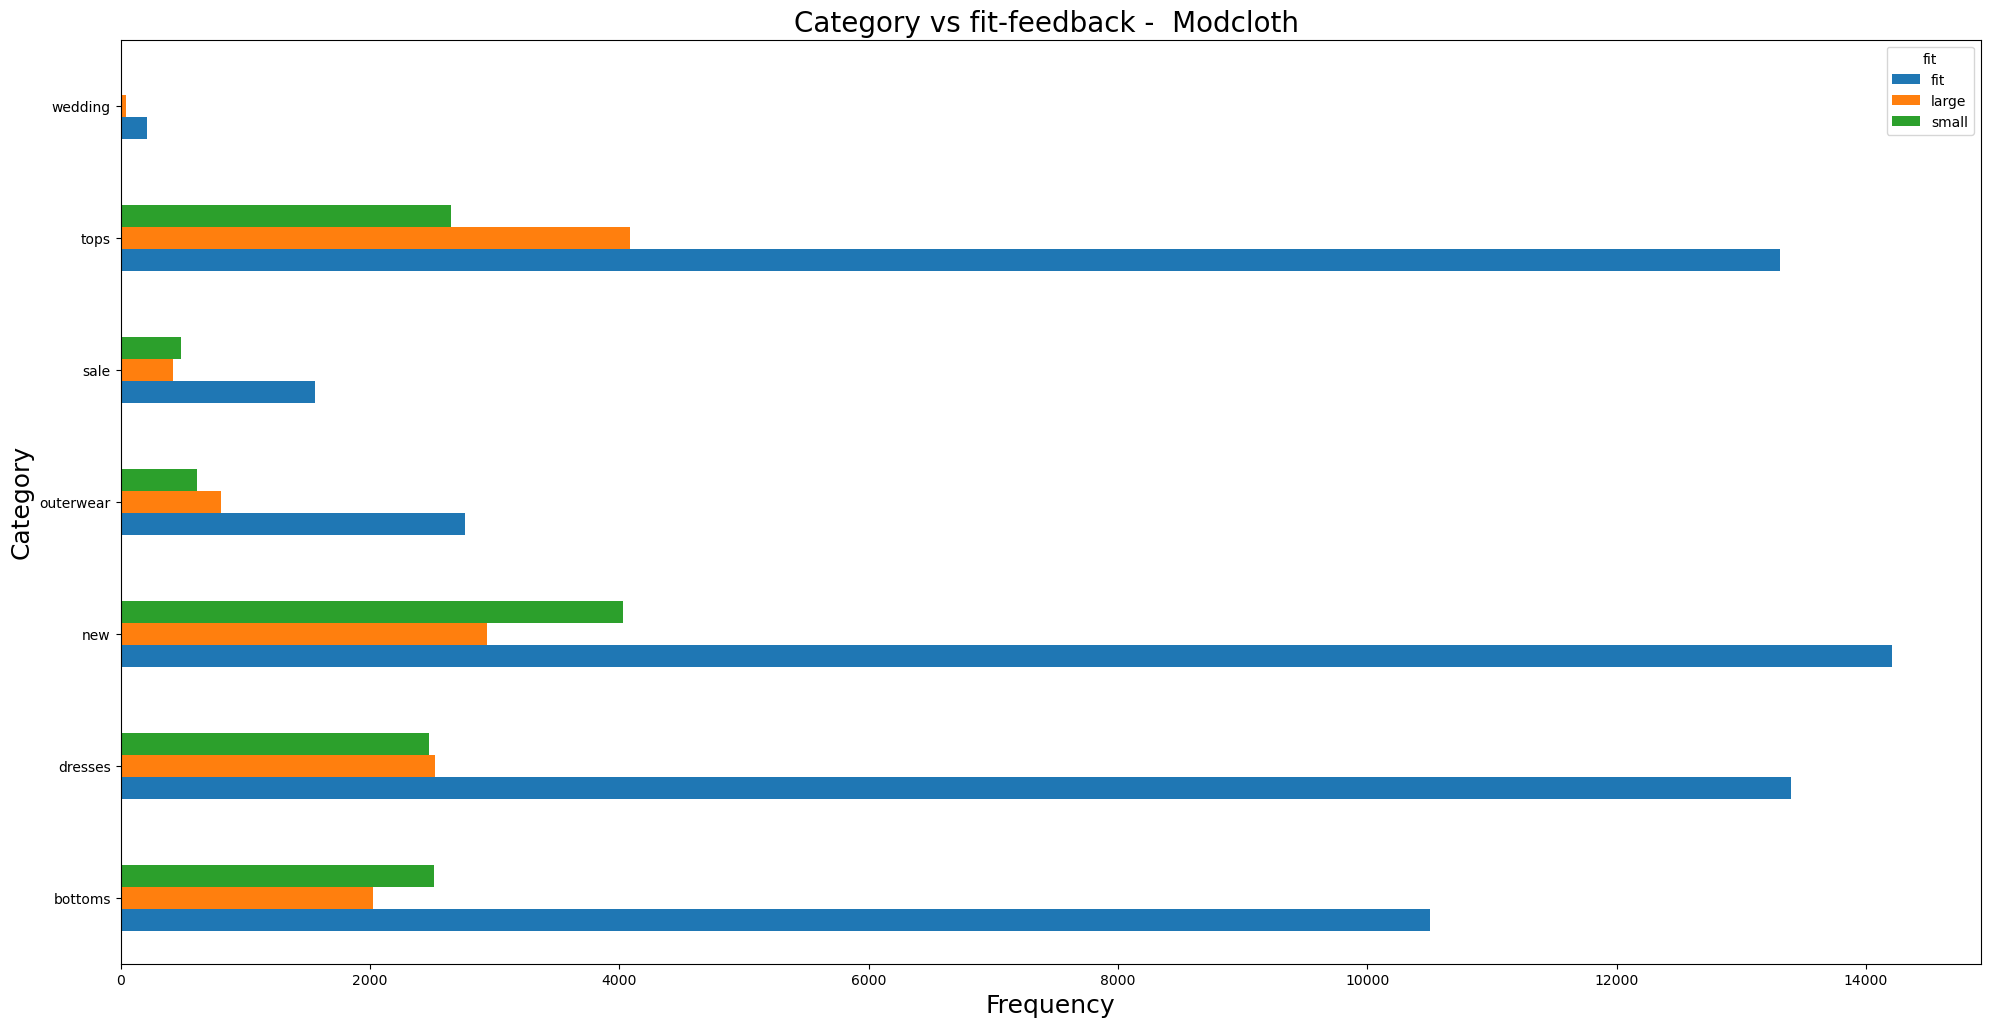

In [26]:
g_by_category = mc_df.groupby('category')
cat_fit = g_by_category['fit'].value_counts()
cat_fit = cat_fit.unstack()
cat_fit_norm = norm_counts(cat_fit)
cat_fit_norm.drop(['fit'], axis=1, inplace=True)
plot_barh(cat_fit, 'fit')

**Nhận xét:**
+ Best-fit response (fit) cao nhất đối với các danh mục hàng mới, váy và áo.
+ Nhìn chung, phản hồi xấu tối đa về độ vừa vặn chủ yếu thuộc về 2 categories- new và tops! Các Dresses và bottoms  theo sau.
+ Weddings, outerwear, và sale không nổi bật trong visualization của chúng tôi - chủ yếu là do thiếu transactions trong các categories này.

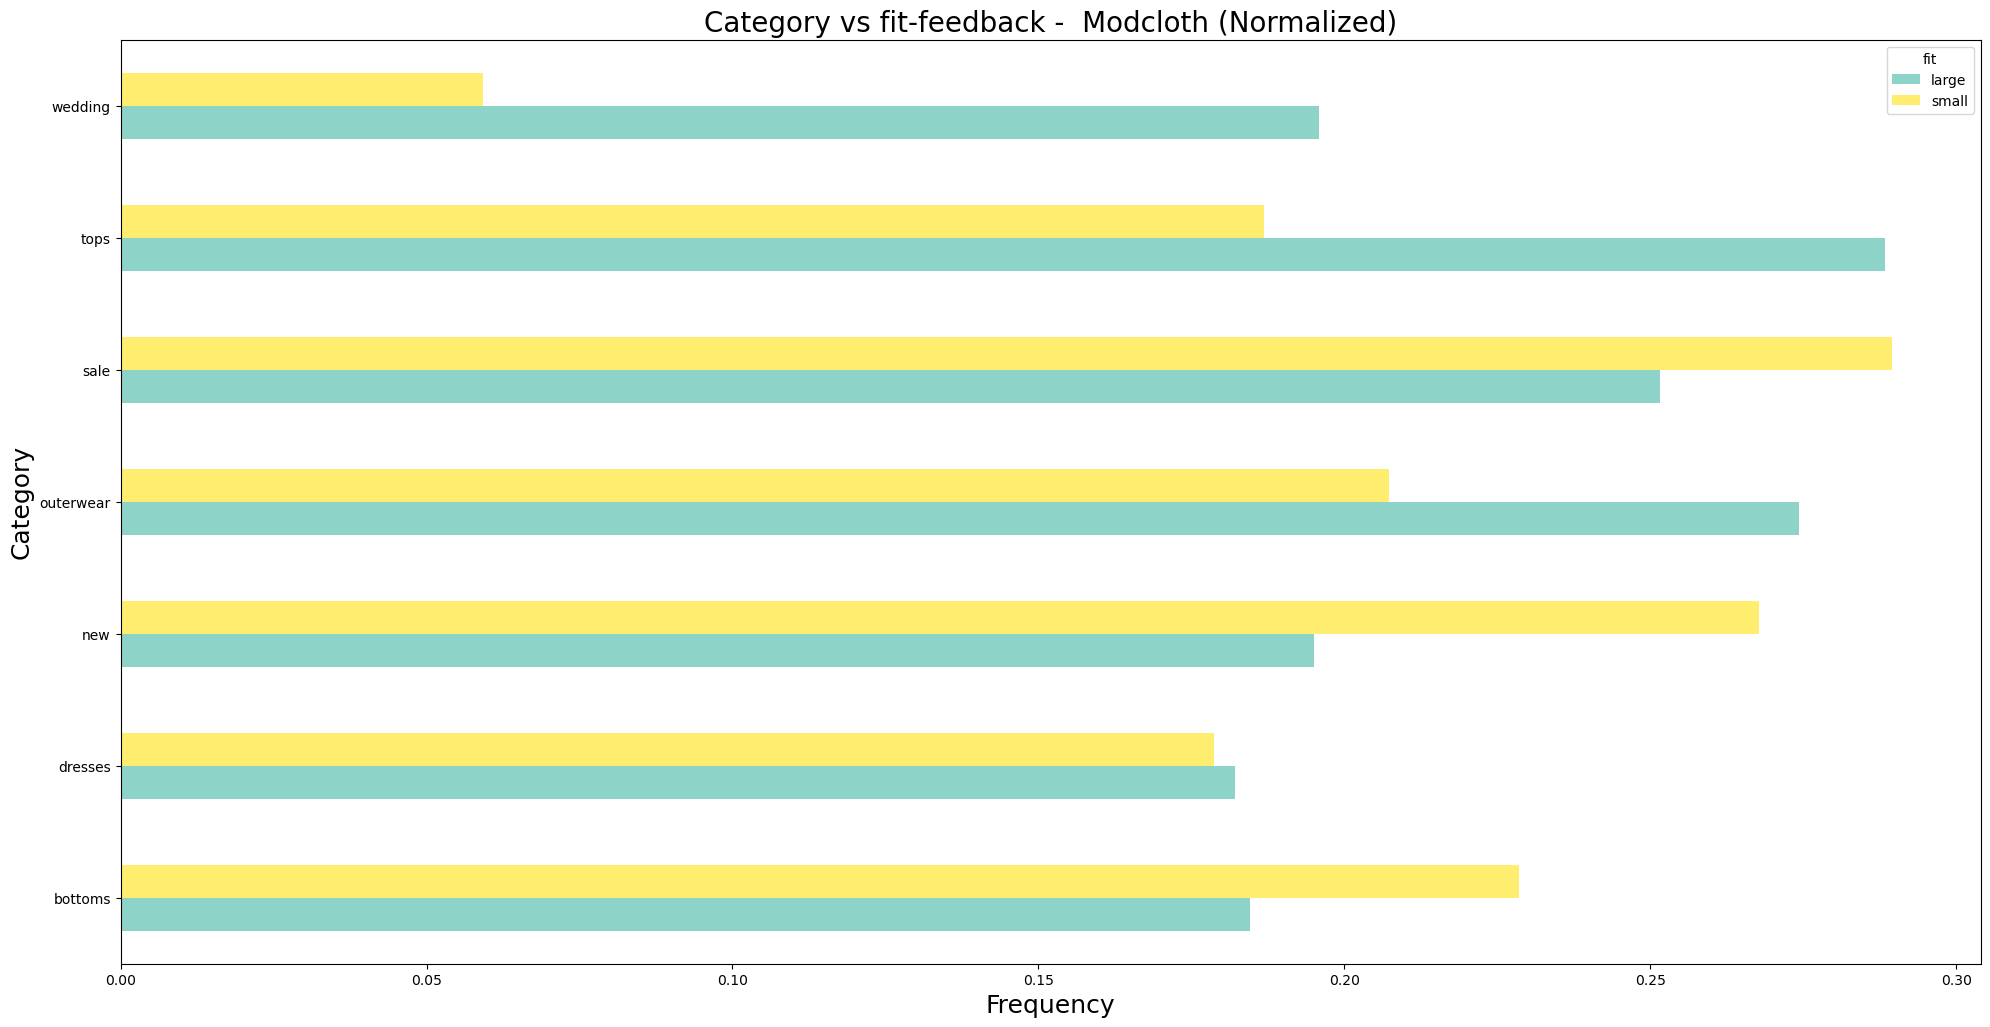

In [27]:
plot_barh(cat_fit_norm, 'fit', norm=1, cmap='Set3')

**Nhận xét:**

Ở đây, chúng ta có thể thấy rằng giữa các categories:
+ Các Wedding, tops & outerwear categories thường có nhiều hàng trả lại hơn do kích thước lớn.
+ New, sale, & bottoms thường có hàng về thường xuyên do mua cỡ nhỏ.
+ Dresses có lý do hoàn trả tương tự, xét về độ vừa vặn.

### Category vs Length

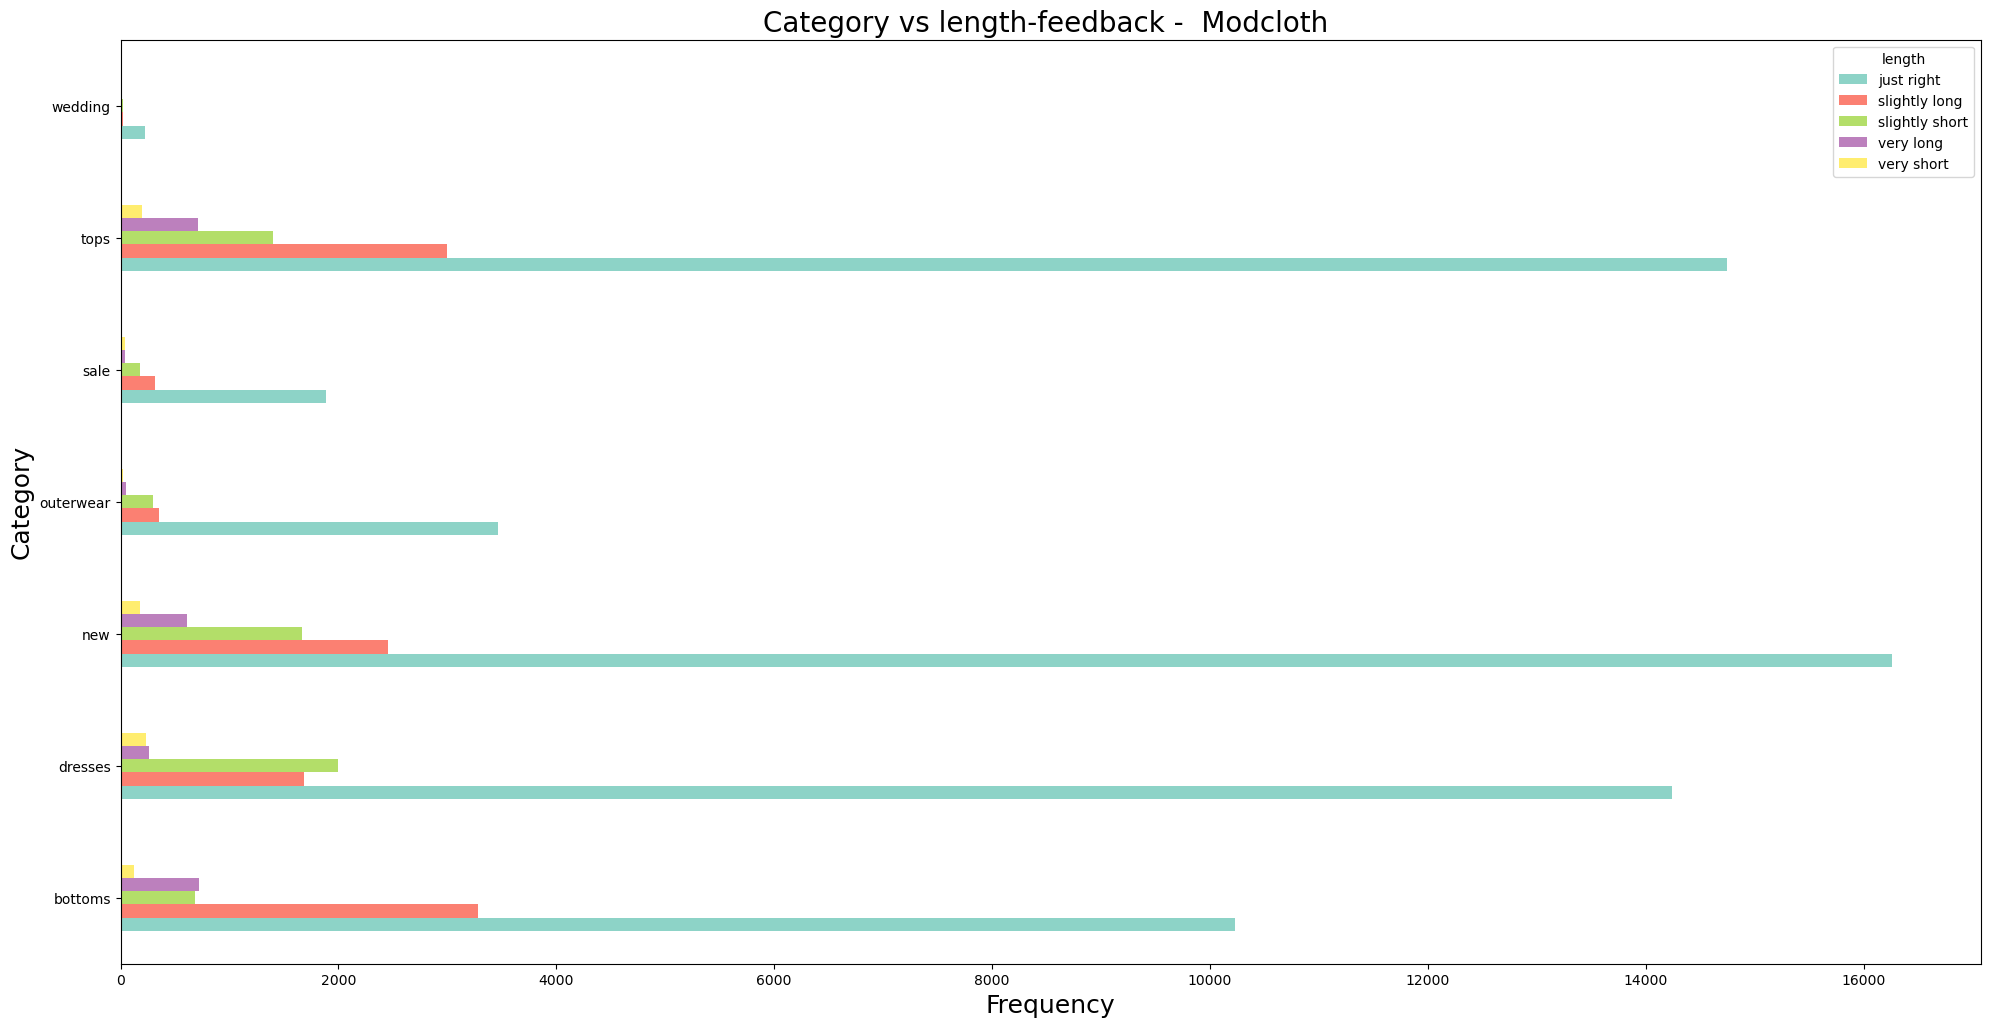

In [28]:
cat_len = g_by_category['length'].value_counts()
cat_len = cat_len.unstack()
plot_barh(cat_len, 'length', 'Set3')

**Nhận xét:**
+ Best length-fitting ('just right') thuộc về tops, new, dresses và bottoms! (Cũng do các danh mục này chiếm ưu thế trong tổng số giao dịch - chúng chiếm gần 92%)
+ Tất cả các giao dịch đều có chung một thứ tự lý do trả lại (theo thứ tự quan trọng), điều này cũng khá trực quan:
    + slightly long - hơi dài
    + slightly short - hơi ngắn
    + very long - rất dài
    + very short - rất ngắn

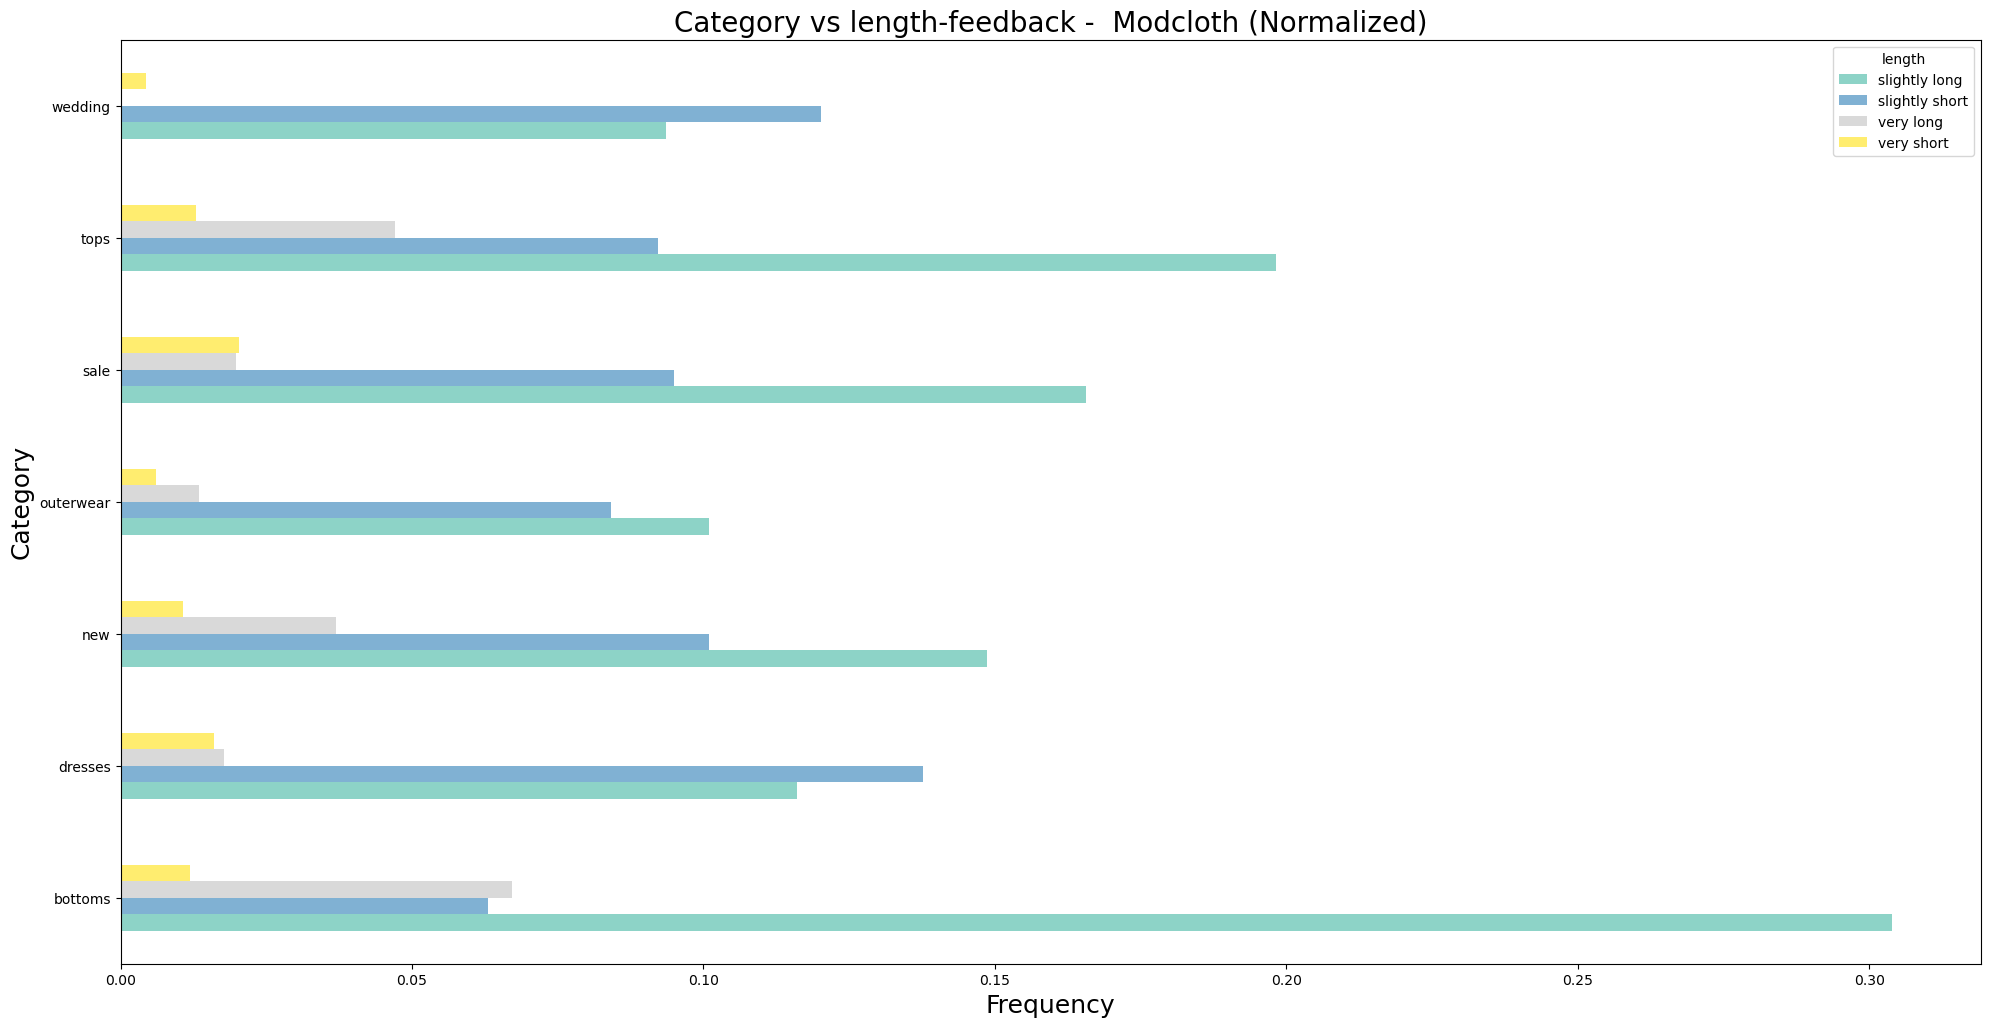

In [29]:
cat_len_norm = norm_counts(cat_len)
cat_len_norm.drop(['just right'], axis = 1, inplace=True)
plot_barh(cat_len_norm, 'length', cmap='Set3', norm=1)

**Nhận xét:**
The normalized plot, focusing on the problems allows us to dig deeper into length-wise reasons of return per category:
+ Customers tend to make 'slightly long' purchases in bottoms, new, sale, & tops categories.
+ 'slightly short' returns take place mostly in dresses and wedding categories.

### Category vs Quality

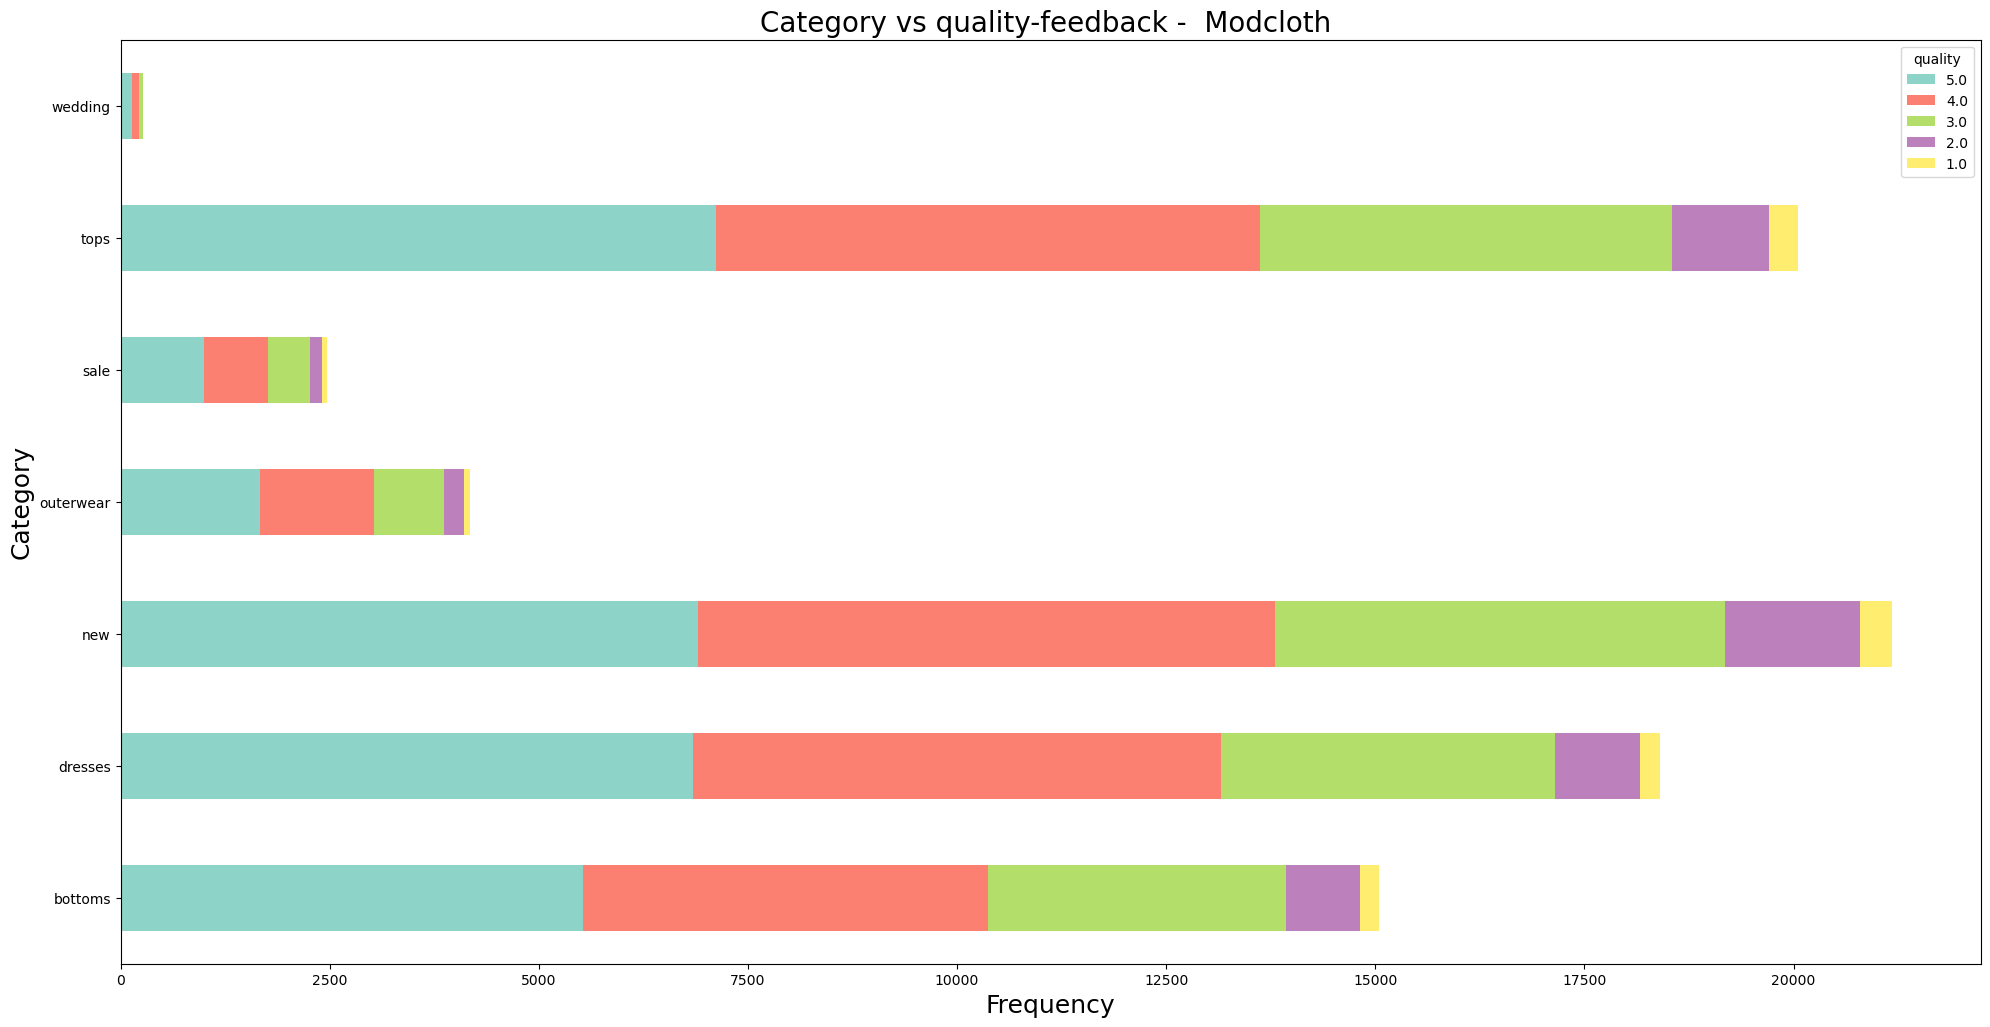

In [30]:
cat_quality = g_by_category['quality'].value_counts()
cat_quality = cat_quality.unstack()
plot_barh(cat_quality, 'quality', 'Set3', stacked=1)

**Nhận xét:**
+ Hầu như cùng một tỷ lệ người đánh giá các categories of tops, new, dresses và bottoms là 5, 4 & 3.
+ Tất cả các xu hướng về tỷ lệ xếp hạng dường như không đổi giữa các categories.

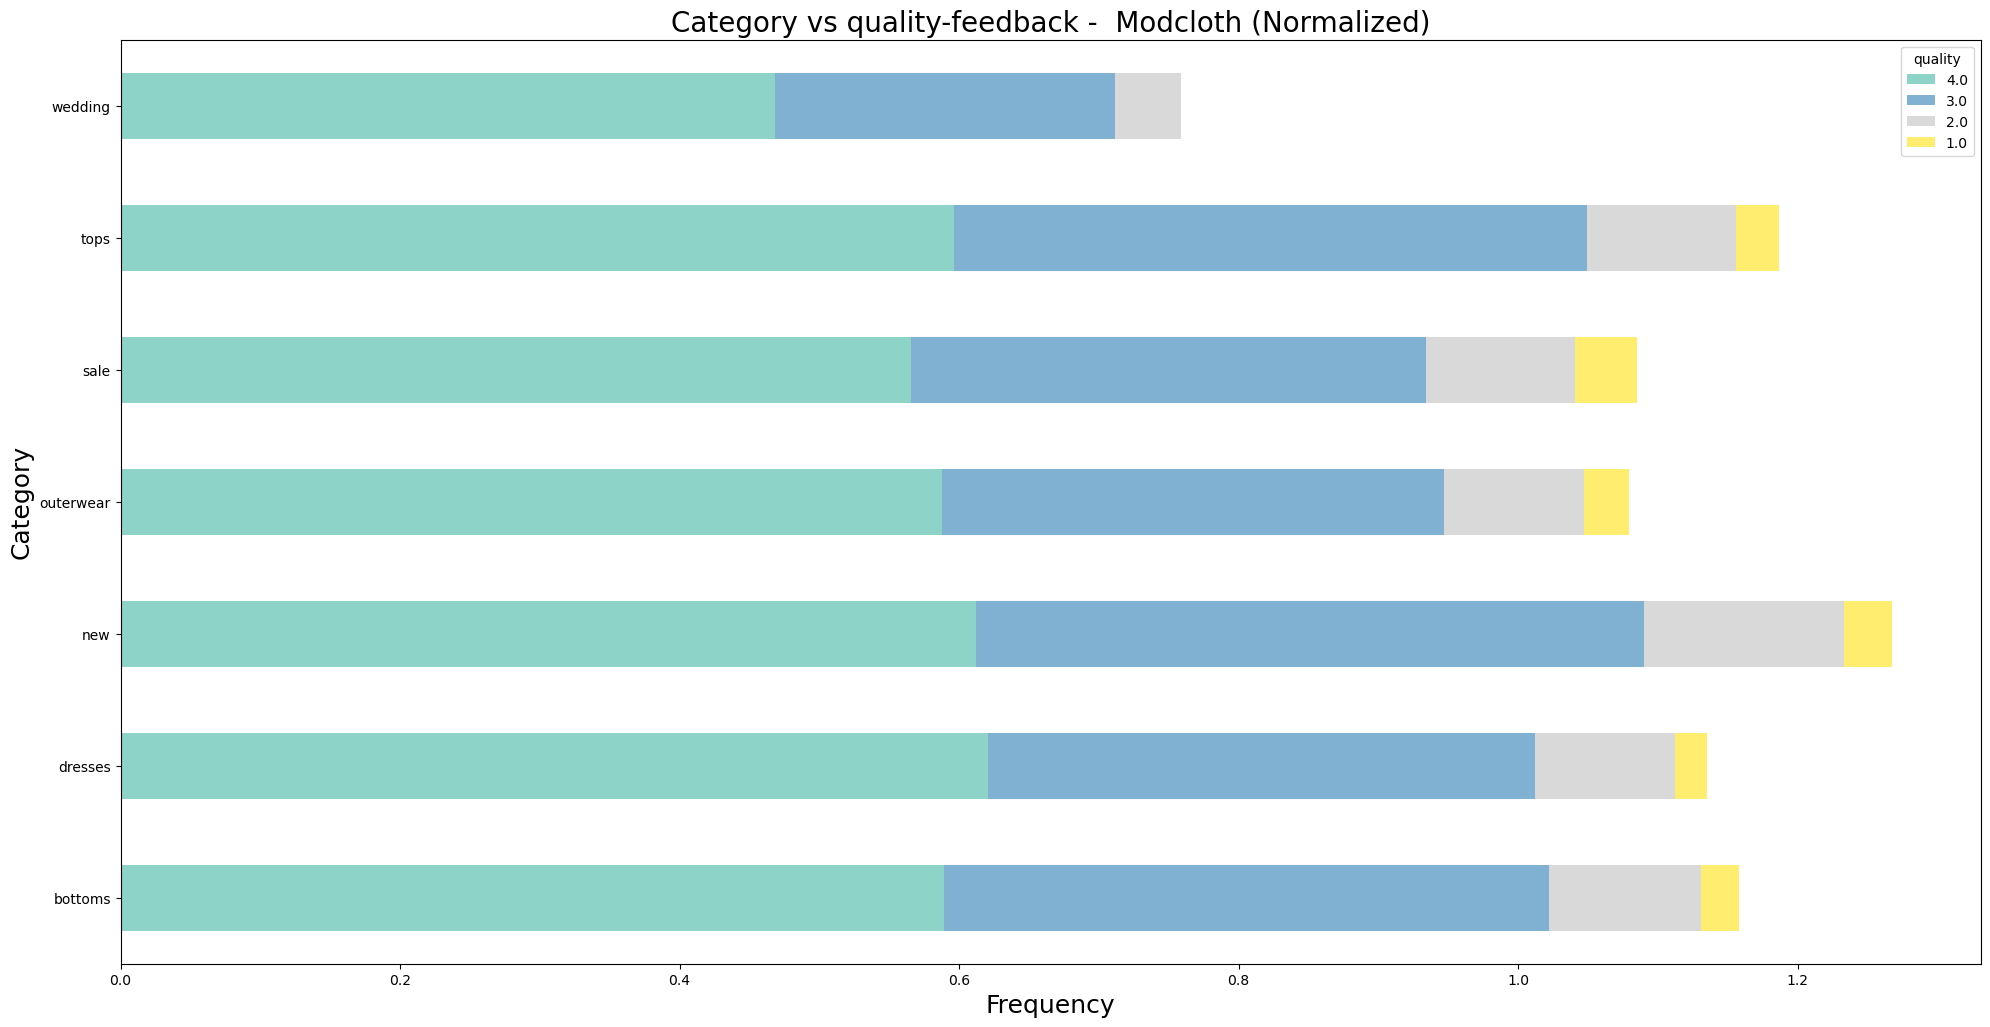

In [31]:
cat_quality_norm = norm_counts(cat_quality)
cat_quality_norm.drop([5.0], axis = 1, inplace=True)
plot_barh(cat_quality_norm, 'quality', 'Set3', stacked=1, norm=1)

Ở đây, chúng tôi cũng có thể khẳng định quan sát trước đây của mình rằng tất cả các danh mục đều có tỷ lệ xếp hạng tương tự nhau.

Đối với nitpick - new , sale & tops dường như có tỷ lệ xếp hạng kém (1.0 & 2.0) cao hơn bình thường về chất lượng.

**Thanks for reading this post.**
<h4 style='background:#4EE2EC; border:0; color:black'><center>Make by Lucas</center></h4> 

**You can contact me at:**  
+ Gmail: lehongngoc.work@gmail.com   
+ GitHub: [LeHongNgoc3820](https://github.com/LeHongNgoc3820)   
+ Linkedln: [Ngoc Le Hong](https://www.linkedin.com/in/ngoc-le-hong-44131b21a/)